In [1]:
from IPython.display import YouTubeVideo, Image
import warnings
warnings.filterwarnings('ignore')

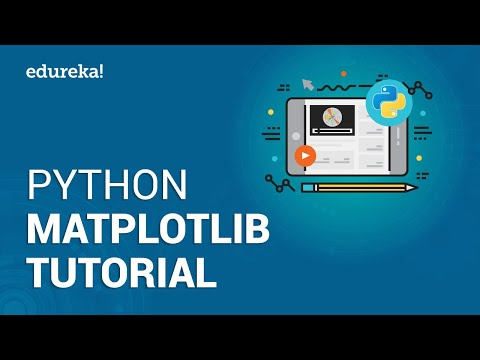

In [2]:
YouTubeVideo(id='yZTBMMdPOww', width=900, height=400)

# `matplotlib` - 2D

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Declare a pre-difinerd style
# you can define your own style
plt.style.use('fivethirtyeight')

# Useful for plots to display in cells
%matplotlib inline

### `plt.plot`

To plot a curve with the `plot` function, we only give **a list** of values, they are considered as the **Y**, the **X** being the integers in sufficient number and starting at 0.

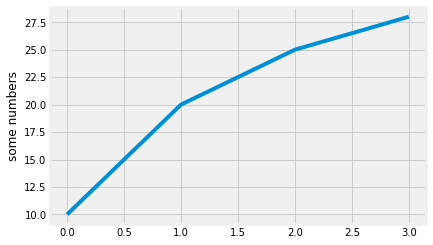

In [4]:
# if I give only one list to plot
# then these are the Y
plt.plot([10, 20, 25, 28])
# you can also easily add a label
# here on the y axis
plt.ylabel('some numbers')

plt.show()

You can change the style used by `plot` to plot; this style is specified as a string, by default `'b-'`, which means a blue line (`b` for blue, and `-` for line). Here we will specify instead `ro`, `r` which means red and `o` which means circle.

See [the plot reference documentation](https://matplotlib.org/2.0.2/api/pyplot_api.html#matplotlib.pyplot.plot) for a complete list.

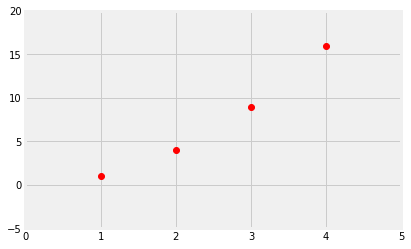

In [5]:
# but most often we go to plot
# a list of X AND a list of Y
plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25], 'ro')

# here we mean to use
# for the X axis: between 0 and 5
# for the Y axis: between -5 and 20
plt.axis([0, 5, -5, 20])

plt.show()

You can very simply draw several functions in the same area :

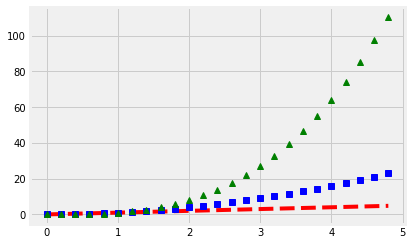

In [6]:
# sample of points between 0 and 5 spaced 0.2
t = np.arange(0., 5., 0.2)

# multiple line styles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
# we could add other plot of course also
plt.show()

### Several *subplots*

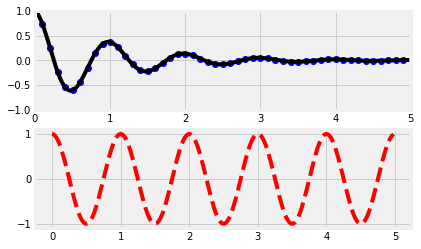

In [7]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

## two almost identical domains
# this one for blue dots
t1 = np.arange(0.0, 5.0, 0.1)
# this one for the blue line
t2 = np.arange(0.0, 5.0, 0.02)

# this call is not necessary
# you can check that we could remove it
plt.figure(1)
# we create a 'subplot'
plt.subplot(211)
# the operation of matplotlib is said to be 'stateful'
# by default we draw in the last object created
plt.axis([0, 5, -1, 1])
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

# a second subplot
plt.subplot(212)
# we write in it
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

It is in order to be able to build such assemblies that there is a`plt.show()` function, which indicates that the figure is finished.

We have to go back a bit on the arguments passed to `subplot`. When we write:
```python
plt.subplot(211)
```
which is otherwise just a shortcut to:
```python
plt.subplot(2, 1, 1)
```
we want to say that we want to create a grid of 2 lines of 1 column, and that the subplot will occupy the 1st location.

### Several figures

In fact, we can create several figures, and several *subplots* in each figure. In the following example we illustrate this notion of *statefulness* even better.

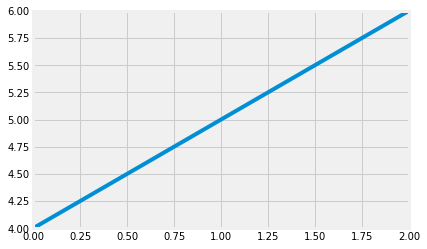

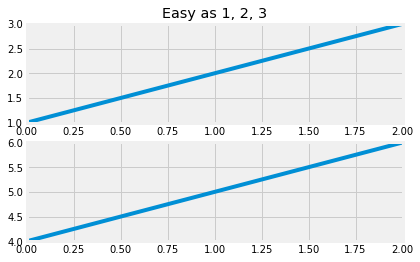

In [8]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.axis([0, 2, 1, 3])
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.axis([0, 2, 4, 6])
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.axis([0, 2, 4, 6])
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current;
                             # subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title
plt.show()

This way of doing things can be improved. First of all, it is a source of errors, you have to remember the above, and suddenly, if you change the logic a little bit, it risks breaking everything else. Also depending on the environment, we can get a nasty warning.

This is why I advise you instead, to do the same thing as above, to use `plt.subplots` which returns you the figure with its *subplots*, which you can store in Python variables:

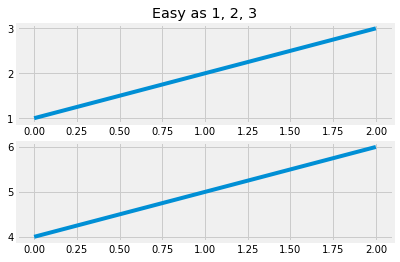

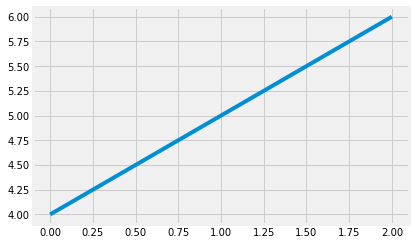

In [9]:
# it's quite confusing at first, but
# traditionally subplots are called 'axes'
# this is why here we use ax1, ax2 and ax3 to denote
# of subplots

# here I create a figure and two subplots,
# on a grid of 2 rows * 1 column
fig1, (ax1, ax2) = plt.subplots(2, 1)

# instead of doing plt.plot, you can send
# the method plot to a subplot
ax1.plot([1, 2, 3])
ax2.plot([4, 5, 6])

fig2, ax3 = plt.subplots(1, 1)
ax3.plot([4, 5, 6])

# to return to the first subplot
# just use the variable ax1
# be careful we did with 'plt.title'
# here is the 'set_title' method
ax1.set_title('Easy as 1, 2, 3')

plt.show()

### `plt.hist`

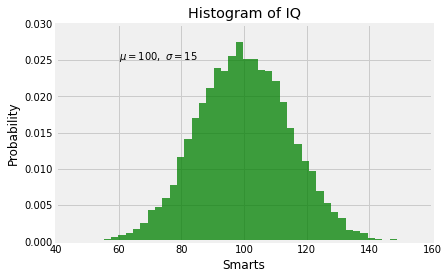

In [10]:
# to be reproducible, we fix the seed
# of the random generator
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)

plt.show()


### `plt.scatter`

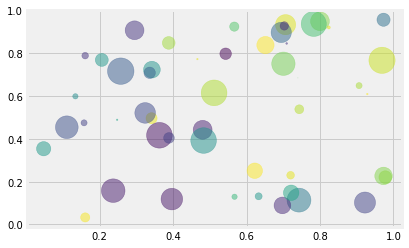

In [11]:
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

### `plt.boxplot`

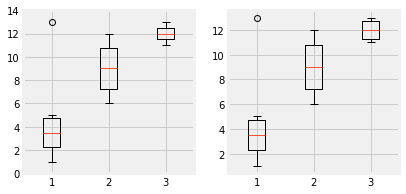

In [12]:
plt.figure(figsize=(6, 3))

plt.subplot(121)
# we can pass a list of sequences of numbers to boxplot
# each suite gives rise to a mustache box
# here 3 suites
plt.boxplot([[1, 2, 3, 4, 5, 13], [6, 7, 8, 10, 11, 12], [11, 12 ,13]])
plt.ylim(0, 14)

plt.subplot(122)
# we can also, as always, pass him a numpy ndarray
# attention it is read in the other direction, here also we have 3 series of numbers
plt.boxplot(np.array([[1, 6, 11],
                      [2, 7, 12],
                      [3, 8, 13],
                      [4, 10, 11],
                      [5, 11, 12],
                      [13, 12, 13]]))
plt.show()